<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/NN7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process *Imbalanced Dataset* using **SMOTE**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

## Data Preprocessing



In [99]:
df= pd.read_csv("creditcard.csv")

In [100]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [101]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [102]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [104]:
df.shape

(284807, 31)

In [105]:
#Unbalanced Dataset
df['Class'].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


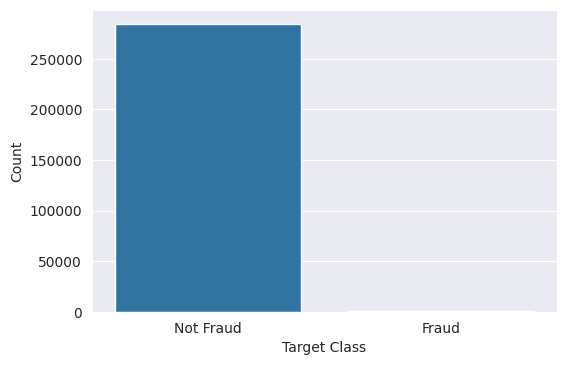

In [106]:
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.countplot('Class',data=df)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0,1],['Not Fraud','Fraud'])
plt.show()

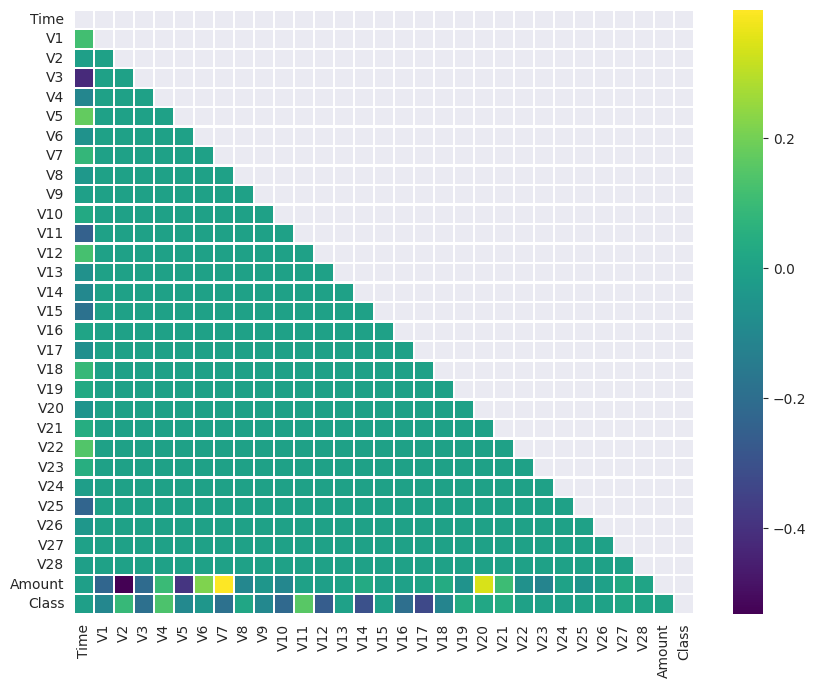

In [107]:
mask = np.triu(np.ones_like(df.corr(),dtype=bool))
plt.figure(dpi=100,figsize=(10,8))
sns.heatmap(df.corr(),yticklabels=True,mask=mask,cmap='viridis',annot=False, lw=1)
plt.show()

In [108]:
#Split Data into Training set and Test Set
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True)

## SMOTE

In [109]:
x=df_train.drop(["Class"],1)
y=df_train["Class"]

<ipython-input-109-68d332260531>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df_train.drop(["Class"],1)


In [110]:
from imblearn.over_sampling import SMOTE
smk=SMOTE(random_state=0)
x_new,y_new=smk.fit_resample(x,y)

In [111]:
x_new.shape, y_new.shape

((454918, 30), (454918,))

In [112]:
#Convert the data frame to tensor
x_new =torch.from_numpy(x_new.values).type(dtype=torch.float)
y_new =torch.from_numpy(y_new.values).type(dtype=torch.float)

## **Neural Network** Model in **PyTorch**

In [113]:
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader,  Subset

In [114]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Splitting Dataset

In [115]:
#Split Data into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.1, shuffle=True)

In [116]:
#Setup The Model 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(nn.Linear(30, 64),
                                nn.ReLU(),
                                nn.Linear(64, 32),
                                nn.ReLU(),
                                nn.Linear(32, 16),
                                nn.ReLU(),
                                nn.Linear(16,1))
  

  def forward(self, x):
    x = self.layers(x)
    return x

In [117]:
model_0 = NeuralNetwork()
model_0 = model_0.to(device)
model_0

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=30, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [118]:
#Setup The Loss Function
loss_fn= nn.BCEWithLogitsLoss()

#Setup the Optimizer
optimizer= torch.optim.Adam(params=model_0.parameters(),lr=5e-5)

In [119]:
#Calculate the accuracy
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

In [120]:
X_train.shape

torch.Size([409426, 30])

In [121]:
torch.manual_seed(42)

#Set the number of epoch
epochs=4000
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

train_loss_values = []
test_loss_values = []
epoch_count = []

#Building training and evaluation loop:
for epoch in range(epochs):
  #Training
  model_0.train()

  ##Forward Pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) #turn logit -> pred probp -> pred label
  
  ##Claculate Loos/Accuracy
  loss = loss_fn(y_logits, y_train) ##nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  ##Optimizer zero grad
  optimizer.zero_grad()

  ##Loss backward - Backward Propagation
  loss.backward()

  ##Optimizer Step
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():

    ##Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    ##Claculate Test Loos/ Accuracy
    test_loss = loss_fn(test_logits, y_test) ##nn.BCEWithLogitsLoss expects raw logits as input
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print th result
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.to("cpu").detach().numpy())
    test_loss_values.append(test_loss.to("cpu").detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 10.62160, Accuracy: 50.04% | Test loss: 6.92360, Test acc: 49.61%
Epoch: 10 | Loss: 1.40624, Accuracy: 50.14% | Test loss: 2.16188, Test acc: 49.70%
Epoch: 20 | Loss: 0.72153, Accuracy: 53.13% | Test loss: 0.85020, Test acc: 49.73%
Epoch: 30 | Loss: 0.67921, Accuracy: 50.37% | Test loss: 0.85213, Test acc: 49.73%
Epoch: 40 | Loss: 0.77957, Accuracy: 50.16% | Test loss: 0.72526, Test acc: 49.80%
Epoch: 50 | Loss: 0.67177, Accuracy: 61.79% | Test loss: 0.69634, Test acc: 55.38%
Epoch: 60 | Loss: 0.66543, Accuracy: 64.71% | Test loss: 0.66910, Test acc: 65.19%
Epoch: 70 | Loss: 0.66354, Accuracy: 70.11% | Test loss: 0.66270, Test acc: 65.23%
Epoch: 80 | Loss: 0.66117, Accuracy: 68.00% | Test loss: 0.66149, Test acc: 71.04%
Epoch: 90 | Loss: 0.65966, Accuracy: 68.08% | Test loss: 0.65897, Test acc: 67.07%
Epoch: 100 | Loss: 0.65820, Accuracy: 70.23% | Test loss: 0.65726, Test acc: 70.34%
Epoch: 110 | Loss: 0.65638, Accuracy: 69.42% | Test loss: 0.65556, Test acc: 70.40%
Ep

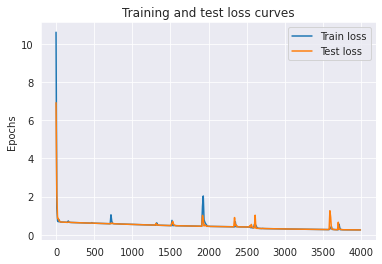

In [122]:
# Plot the loss curves - lr=5e-5 , epochs=4000
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Epochs")
plt.legend()

In [123]:
from sklearn.metrics import precision_recall_fscore_support

In [124]:
x_final_test = df_test.drop(["Class"],1)
y_final_test = df_test["Class"]
x_final_test =torch.from_numpy(x_final_test.values).type(dtype=torch.float)
y_final_test =torch.from_numpy(y_final_test.values).type(dtype=torch.float)

<ipython-input-124-6ba312e941aa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_final_test = df_test.drop(["Class"],1)


In [125]:
torch.manual_seed(42)

#Set the number of epoch
epochs=500

x_final_test, y_final_test= x_final_test.to(device), y_final_test.to(device)

#Building training and evaluation loop:
for epoch in range(epochs):
  #Testing
  model_0.eval()
  with torch.inference_mode():

    ##Forward pass
    test_final_logits=model_0(x_final_test).squeeze()
    test_final_pred=torch.round(torch.sigmoid(test_final_logits))

    ##Claculate Test Loos/ Accuracy
    test_final_loss = loss_fn(test_final_logits, y_final_test) ##nn.BCEWithLogitsLoss expects raw logits as input
    test_final_acc = accuracy_fn(y_true=y_final_test, y_pred=test_final_pred)

  #Print th result
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test loss: {test_final_loss:.5f}, Test acc: {test_final_acc:.2f}%")
    precision, recall, fscore, support = precision_recall_fscore_support(y_final_test.to("cpu"), test_final_pred.to("cpu"), average='macro')
    print(f"Precision: {precision} | Recall: {recall} | F1 Score: {fscore}")
  

Epoch: 0 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 10 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 20 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 30 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 40 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 50 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 60 | Test loss: 0.26882, Test acc: 99.00%
Precision: 0.5713131410508477 | Recall: 0.933772111471284 | F1 Score: 0.620330548303317
Epoch: 70 | Test loss: 0.26882, Test acc: 